In [14]:
import tensorflow as tf
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [18]:
x_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
x_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [19]:
x_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_test_df.shape

(10000, 785)

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [23]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

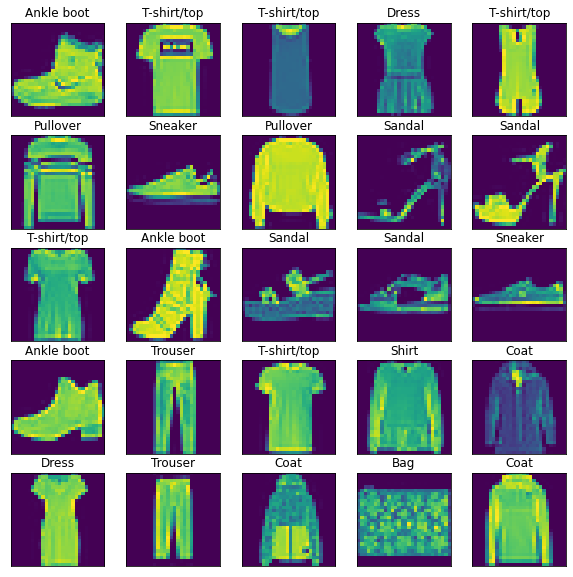

In [25]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.8214 - accuracy: 0.6926 - val_loss: 0.6248 - val_accuracy: 0.7745
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5379 - accuracy: 0.8026 - val_loss: 0.5179 - val_accuracy: 0.8167
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.4611 - accuracy: 0.8340 - val_loss: 0.4962 - val_accuracy: 0.8112
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.4192 - accuracy: 0.8499 - val_loss: 0.4554 - val_accuracy: 0.8318
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3924 - accuracy: 0.8575 - val_loss: 0.4067 - val_accuracy: 0.8528
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3714 - accuracy: 0.8653 - val_loss: 0.4036 - val_accuracy: 0.8539
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3544 - accuracy: 0.8711 - val_loss: 0.3753 -

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.8815

Test loss: 0.3313751816749573

Test accuracy: 0.8815000057220459


In [38]:
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 3s 9ms/step


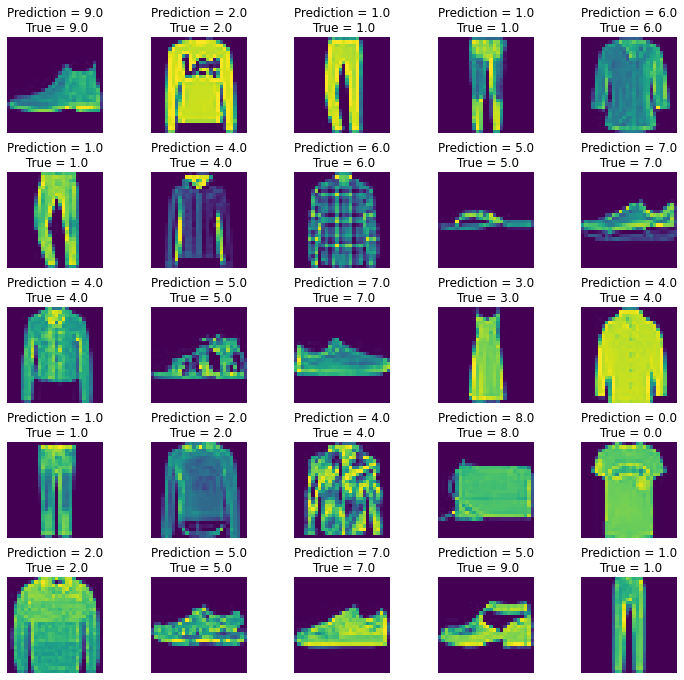

In [39]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"Prediction = {(predicted_classes[i]):0.1f}\n True = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)